In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Part 1.1

In [3]:
df = pd.read_csv('bill_authentication.csv')
df.head(5)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Part 1.3

In [6]:
X = df[['Variance','Skewness','Curtosis','Entropy']]
y = df['Class']

## part 1.2
- Class 0 is “genuine” -> Green
- Class 1 is “forgery” -> Red

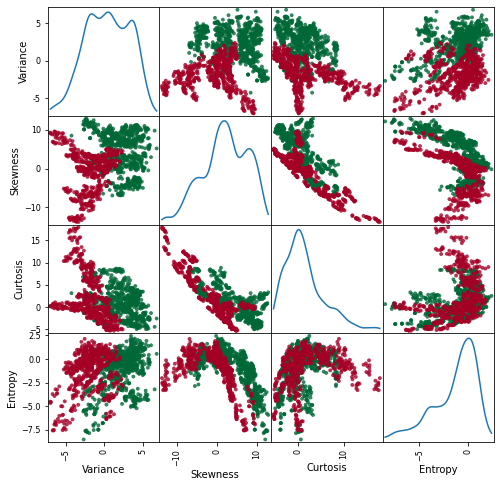

In [7]:
graph = pd.plotting.scatter_matrix(X, c=y, figsize=(8, 8), diagonal='kde', marker='.',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8, cmap= 'RdYlGn_r')

## Part 1.4

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Part 2.1

In [22]:
parameters1 = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

tree1 = DecisionTreeClassifier()
clf1 = GridSearchCV(tree1, parameters1)
clf1.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

## Part 2.2

In [23]:
y_test_hat1 = clf1.predict(X_test)

## Part 2.3

In [24]:
print(f"-------------Tree------------- \n{confusion_matrix(y_test,y_test_hat1)}\n")
print(f"-------------Tree------------- \n{classification_report(y_test,y_test_hat1)}\n")

-------------Tree------------- 
[[155   2]
 [  3 115]]

-------------Tree------------- 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       157
           1       0.98      0.97      0.98       118

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275




## Part 3.1

In [25]:
parameters2 = {'C':[1, 3, 5, 10, 30]}
svc2 = SVC(kernel='linear')
clf2 = GridSearchCV(svc2, parameters2)
clf2.fit(X_train, y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 3, 5, 10, 30]})

## Part 3.2

In [26]:
y_test_hat2 = clf2.predict(X_test)

## Part 3.3

In [30]:
print(f"-------------SVC Linear------------- \n{confusion_matrix(y_test,y_test_hat2)}\n")
print(f"-------------SVC Linear------------- \n{classification_report(y_test,y_test_hat2)}\n")

-------------SVC Linear------------- 
[[153   4]
 [  2 116]]

-------------SVC Linear------------- 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       157
           1       0.97      0.98      0.97       118

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275


